In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
# have to do this for now, don't want to restart my jupyter server
sys.path.append(r'/home/zequnl/Installs/enlib') 

In [3]:
from __future__ import print_function
import numpy as np
from orphics import lensing,io,stats,cosmology,maps
import matplotlib.pyplot as plt 

We first generate some (units) spectra with orphics/pyCAMB.

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_3000_20180726.pkl
Loaded cached Cls from  output/clphi_low_acc_False_3000_20180726.txt


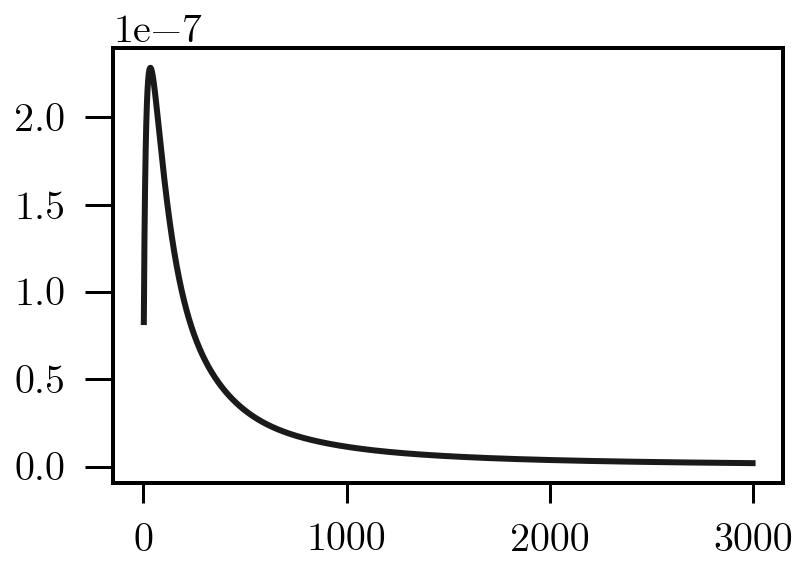

In [4]:
# Initialize cosmology and Clkk. Later parts need dimensionless spectra.# Initia 
lmax = 3000
cc = cosmology.Cosmology(lmax=lmax,pickling=True,dimensionless=False)
theory = cc.theory
ells = np.arange(2,lmax,1)
clkk = theory.gCl('kk',ells)

plt.plot(ells, clkk)

Next, we generate some (units) noise curves. 

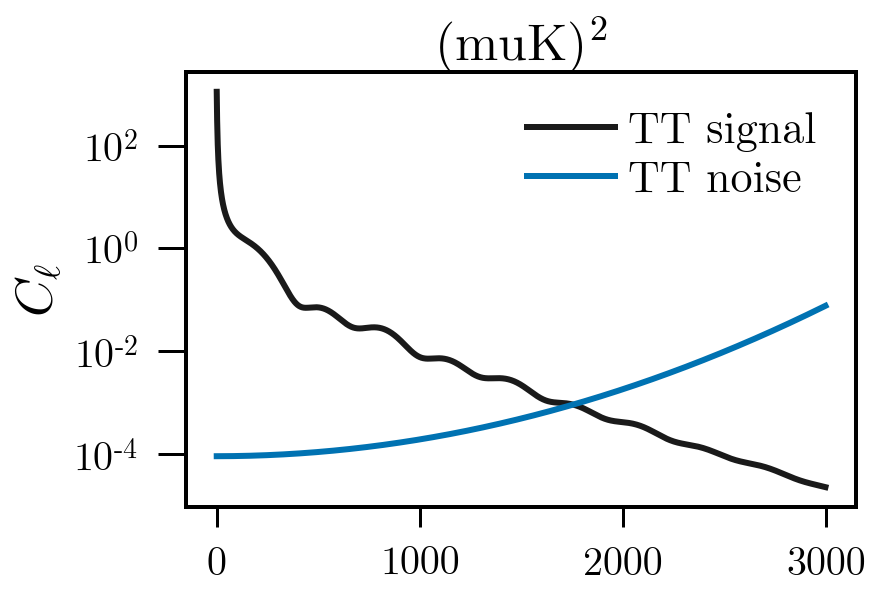

In [22]:
Tcmb = 2.726

sT = 33 * (np.pi/60./180.)
sP = sT * np.sqrt(2.)
theta_FWHM = 7. * (np.pi/60./180.)
muK = Tcmb*1.0e6
# unitless white noise
exp_term = np.exp(ells*(ells+1)*(theta_FWHM**2)/(8*np.log(2)))
NlTT = sT**2 * exp_term #/ muK**2
NlEE = sP**2 * exp_term #/ muK**2
NlBB = sP**2 * exp_term #/ muK**2

plt.plot(theory.lCl('tt',ells), label='TT signal')
plt.plot(NlTT, label='TT noise')
# plt.ylim(0,8e-9)
plt.yscale('log')
plt.ylabel('$C_{\ell}$')
plt.title('(muK)$^2$')
plt.legend()

In [38]:
# Define bin edges for noise curve
bin_edges = np.arange(2,lmax,80)
# Experiment parameters, here for Planck

kmin = 2
kmax = 3000
ls,nlkks,theory_,qest = lensing.lensing_noise(
    ells=ells,
    ntt=NlTT,
    nee=NlEE,
    nbb=NlBB,
    ellmin_t=2,ellmin_e=2,ellmin_b=2,
    ellmax_t=3000,ellmax_e=3000,ellmax_b=3000,
    bin_edges=bin_edges,
    estimators = ['TT','TE','EE','EB','TB'],
    ellmin_k = kmin,
    ellmax_k = kmax,
    theory=theory,
    dimensionless=False)

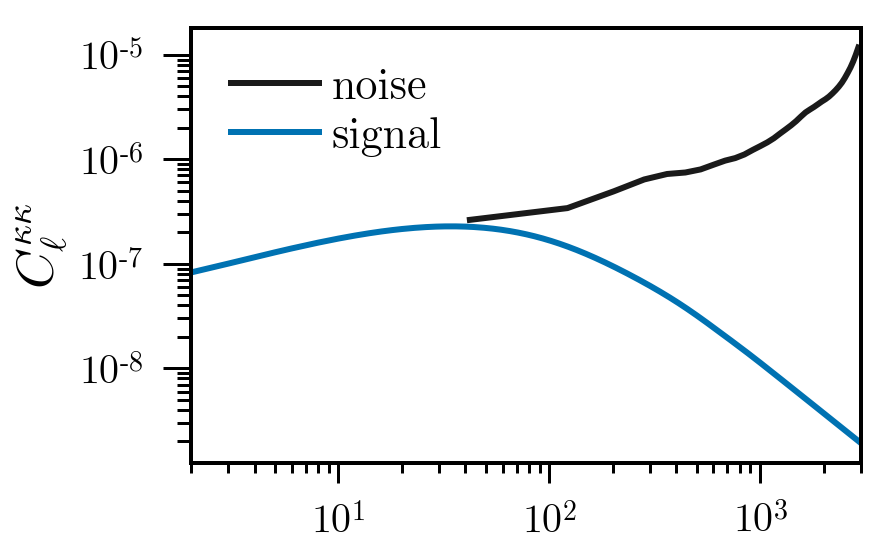

In [40]:
import matplotlib.pyplot as plt 
plt.plot(ls, nlkks['mv'], label='noise')
plt.plot(ells, clkk, label='signal')
plt.yscale('log')
plt.xscale('log')
plt.legend()
# plt.ylim(5e-9,5e-4)
plt.xlim(2,3000)
plt.ylabel('$C_{\ell}^{\kappa\kappa}$');